# Полиномиальные модели

## Из методички

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Парная регрессия**

Парная регрессия - частный случай линейной регрессии, когда зависимая переменная y предсказывается только по одной независимой переменной х. Парная регрессия используется для выявления связи между двумя переменными.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")

In [3]:
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


In [4]:
X = data.x
y = data.y

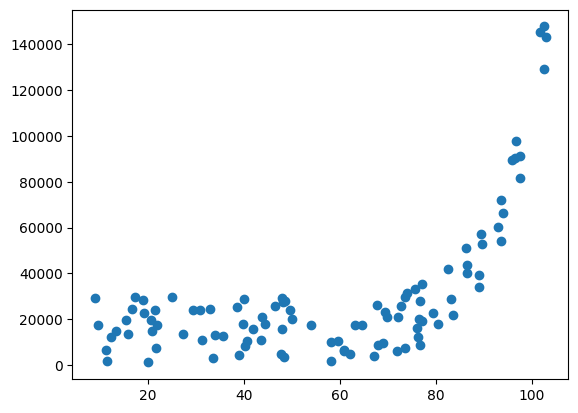

In [5]:
plt.scatter(X, y)

Видно наличие нелинейной зависимости между атрибутом и целевой переменной. Так как не знаем функцию, то строим полиномы разных степеней и оцениваем точность.

In [6]:
X = pd.DataFrame(X) # у нас изначально Х Series, sklearn предполагает, что он DataFrame

In [7]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


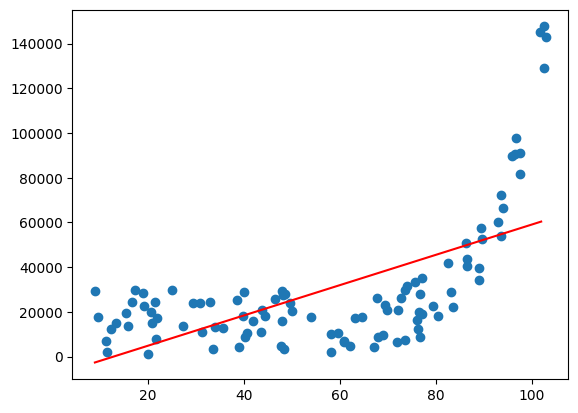

In [8]:
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')

In [9]:
linear.score(X, y) # кэффициент детерминации низкий

0.37467360318911636

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
transformation = PolynomialFeatures(degree=2)

In [12]:
transformation.fit(X)

PolynomialFeatures()

In [13]:
X_2 = transformation.transform(X)

In [14]:
X_2.shape # первая колонка - автоматически добавляемые единицы
          # вторая колонка - исходный х
          # третья колонка - полиномиальный признак х^2
X_2[:5]

array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03],
       [1.00000000e+00, 4.80028921e+01, 2.30427765e+03],
       [1.00000000e+00, 4.79397558e+01, 2.29822018e+03],
       [1.00000000e+00, 4.78090258e+01, 2.28570295e+03],
       [1.00000000e+00, 6.97844271e+01, 4.86986627e+03]])

In [15]:
poly_2d = LinearRegression().fit(X_2, y)


In [16]:
xx_2d = transformation.transform(pd.DataFrame(xx))  # PolynomialFeatures был обучен на данных с именами
# признаков (Х был DataFrame), после трансформации без имен столбцом (стал numpy array). Не влияет на обучение модели.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


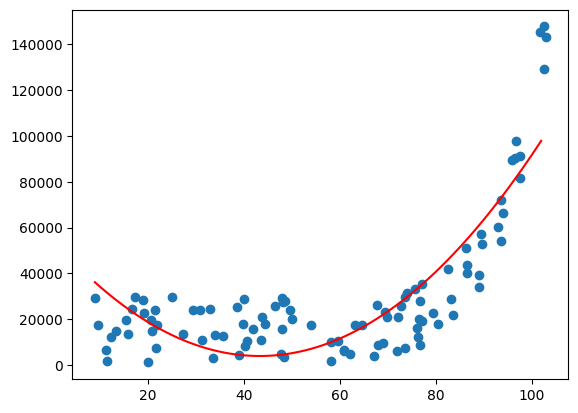

In [17]:
yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

In [18]:
poly_2d.score(X_2, y)

0.7359753787024842

Коэффициент детерминации полиномиальной модели второго порядка значительно выше линейной модели, кривая второго порядка лучше аппроксимирует данные.

**Классификация**

In [19]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv", index_col=0)

In [20]:
y = data.y # целевая переменная
X = data.drop(["y"], axis=1) # атрибуты

В целевой переменной содержится два значения, значит задача бинарной классификации.

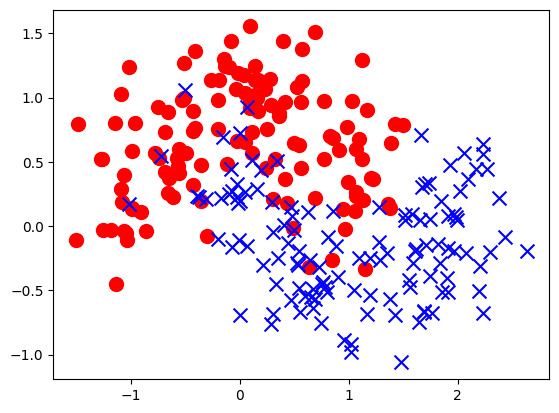

In [21]:
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

Датасет линейно неразделим, значит необходима полиномиальная модель.

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logistic = LogisticRegression().fit(X, y)

<ipython-input-24-bc09005cf8c9>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
<ipython-input-24-bc09005cf8c9>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


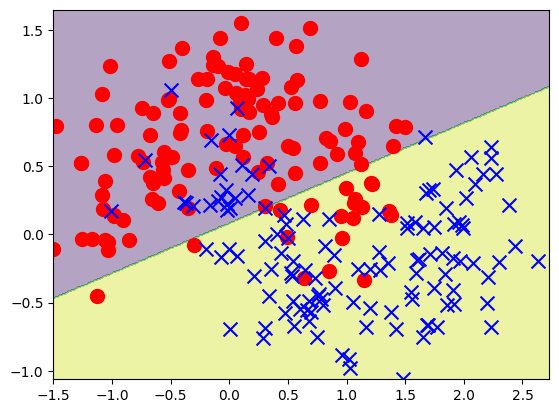

In [24]:
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [25]:
logistic.score(X, y)

0.832

Для построения нелинейной модели создадим объект преобразования и обучим его на матрице атрибутов.

In [26]:
class_transform = PolynomialFeatures(degree=3, include_bias=False) # исключая столбец единиц (итак есть intercept)
X_3 = class_transform.fit_transform(X)

In [27]:
X_3.shape

(250, 9)

Кол-во столбцов определяется числом возможных полиномиальных комбинаций исходных признаков до третьей степени (x1, x2 - исходные признаки; x1^2, x2^2, x1x2 - квадратичные признаки; x1^3, x2^3, x1^2x2, x1x2^2 - кубические  признаки). Итого это дает 9 столбцов.

In [28]:
class_3 = LogisticRegression().fit(X_3, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


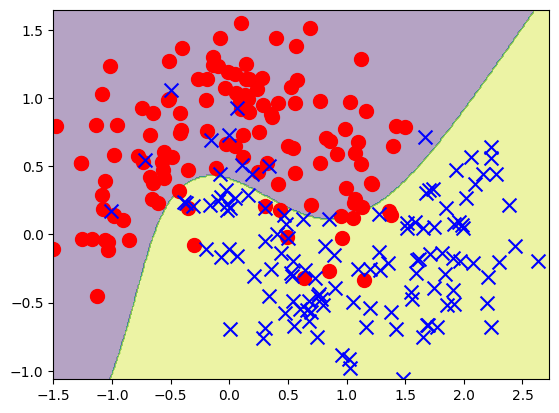

In [29]:
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [30]:
class_3.score(X_3, y)

0.9

Введение полиномиальных признаков также повышает качество модели бинарной классификации.

**Регрессия на реальных данных**

In [31]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [32]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [33]:
y_kc_prices = data_kc_prices.price # столбец с ценой - целевая переменная
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1) # исключаем также дату и идентификатор

In [34]:
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

In [35]:
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.6997471890109161

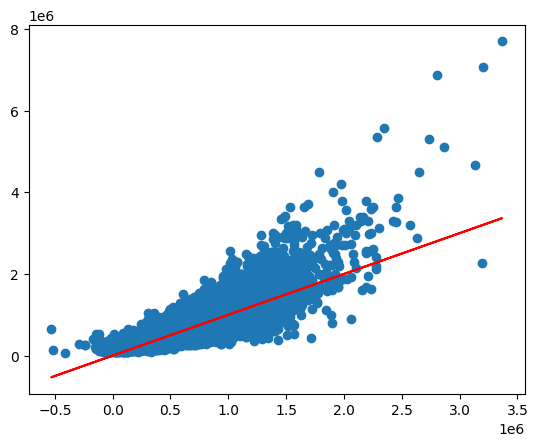

In [36]:
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r') # изображается только целевая переменная

In [37]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)

In [38]:
X_3_kc_prices.shape

(21613, 1330)

In [39]:
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

0.8326020796539212

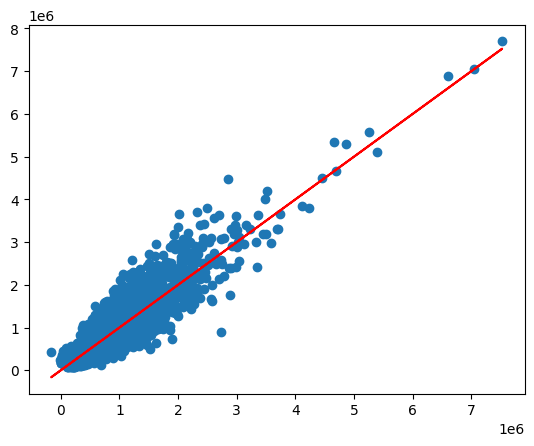

In [40]:
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

Точки ближе к прямой, модель значительно улучшилась.

## Задания для самостоятельного выполнения

*1. В выполненной работе добавьте замер времени обучения каждой модели.*

In [41]:
import time


start_time = time.time()
linear = LinearRegression().fit(X, y) # линейная регрессия
end_time = time.time()
print(f"Линейная модель: {end_time - start_time:.4f} секунд")


transformation = PolynomialFeatures(degree=2) # полиномиальная регрессия 2 степени
X_2 = transformation.fit_transform(X)
start_time = time.time()
poly_2d = LinearRegression().fit(X_2, y)
end_time = time.time()
print(f"Полиномиальная модель 2 степени: {end_time - start_time:.4f} секунд")


start_time = time.time()
logistic = LogisticRegression().fit(X, y) # логистическая регрессия
end_time = time.time()
print(f"Логистическая регрессия: {end_time - start_time:.4f} секунд")


class_transform = PolynomialFeatures(degree=3, include_bias=False) # полиномиальная классификация 3 степени
X_3 = class_transform.fit_transform(X)
start_time = time.time()
class_3 = LogisticRegression().fit(X_3, y)
end_time = time.time()
print(f"Полиномиальная классификация 3 степени: {end_time - start_time:.4f} секунд")


start_time = time.time()
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices) # линейная регрессия (цены домов)
end_time = time.time()
print(f"Линейная регрессия (цены домов): {end_time - start_time:.4f} секунд")


X_3_kc_prices = poly_features_kc_prices.fit_transform(X_kc_prices) # полиномиальная регрессия 3 степени (цены домов)
start_time = time.time()
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
end_time = time.time()
print(f"Полиномиальная регрессия 3 степени (цены домов): {end_time - start_time:.4f} секунд")


Линейная модель: 0.0093 секунд
Полиномиальная модель 2 степени: 0.0030 секунд
Логистическая регрессия: 0.0300 секунд
Полиномиальная классификация 3 степени: 0.0122 секунд
Линейная регрессия (цены домов): 0.1646 секунд
Полиномиальная регрессия 3 степени (цены домов): 13.2482 секунд


*2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.*

In [42]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")
X = data.x
y = data.y

X = pd.DataFrame(X)


transformation = PolynomialFeatures(degree=5) # полиномиальная модель 5 степени
start_time = time.time()
X_poly = transformation.fit_transform(X)

model = LinearRegression().fit(X_poly, y)
end_time = time.time()

score = model.score(X_poly, y)

print(f"Порядок полинома: 5")
print(f"Время обучения: {end_time - start_time:.4f} секунд")
print(f"Коэффициент детерминации: {score:.4f}")
print()


transformation = PolynomialFeatures(degree=10) # полиномиальная модель 10 степени
start_time = time.time()
X_poly = transformation.fit_transform(X)

model = LinearRegression().fit(X_poly, y)
end_time = time.time()

score = model.score(X_poly, y)

print(f"Порядок полинома: 10")
print(f"Время обучения: {end_time - start_time:.4f} секунд")
print(f"Коэффициент детерминации: {score:.4f}")
print()

transformation = PolynomialFeatures(degree=100) # полиномиальная модель 100 степени
start_time = time.time()
X_poly = transformation.fit_transform(X)

model = LinearRegression().fit(X_poly, y)
end_time = time.time()

score = model.score(X_poly, y)

print(f"Порядок полинома: 100")
print(f"Время обучения: {end_time - start_time:.4f} секунд")
print(f"Коэффициент детерминации: {score:.4f}")


Порядок полинома: 5
Время обучения: 0.0053 секунд
Коэффициент детерминации: 0.9217

Порядок полинома: 10
Время обучения: 0.0054 секунд
Коэффициент детерминации: 0.9222

Порядок полинома: 100
Время обучения: 0.0071 секунд
Коэффициент детерминации: 0.7925


Время обучения моделей с полиномами разных степеней отличается незначительно.

Модели с полиномами 5 и 10 степени дают хорошее значение точности с небольшим улучшением. Модель с полиномом 100 степени показывает значительное ухудшение (переобучение).

*3. То же самое проделайте с датасетом для классификации.*

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# классификация
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv")

X = data.drop(columns="y")
y = data["y"]

# полиномиальная модель 5 степени
transformation = PolynomialFeatures(degree=5)
X_poly = transformation.fit_transform(X)

start_time = time.time()
model = LogisticRegression(max_iter=500000).fit(X_poly, y)
end_time = time.time()
y_pred = model.predict(X_poly)
score = accuracy_score(y, y_pred)

print(f"Порядок полинома: 5")
print(f"Время обучения: {end_time - start_time:.4f} секунд")
print(f"Точность: {score:.4f}")
print()

# полиномиальная модель 10 степени
transformation = PolynomialFeatures(degree=10)
X_poly = transformation.fit_transform(X)

start_time = time.time()
model = LogisticRegression(max_iter=500000).fit(X_poly, y)
end_time = time.time()
y_pred = model.predict(X_poly)
score = accuracy_score(y, y_pred)

print(f"Порядок полинома: 10")
print(f"Время обучения: {end_time - start_time:.4f} секунд")
print(f"Точность: {score:.4f}")
print()

# полиномиальная модель 100 степени
transformation = PolynomialFeatures(degree=100)
X_poly = transformation.fit_transform(X)

start_time = time.time()
model = LogisticRegression(max_iter=500000).fit(X_poly, y)
end_time = time.time()
y_pred = model.predict(X_poly)
score = accuracy_score(y, y_pred)

print(f"Порядок полинома: 100")
print(f"Время обучения: {end_time - start_time:.4f} секунд")
print(f"Точность: {score:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Порядок полинома: 5
Время обучения: 1.8860 секунд
Точность: 0.8400

Порядок полинома: 10
Время обучения: 2.6198 секунд
Точность: 0.8240

Порядок полинома: 100
Время обучения: 12.3291 секунд
Точность: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Предупреждение указывает на то, что алгоритм не смог найти решение в заданное количество итераций.

*4. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.*

In [44]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")

y_kc_prices = data_kc_prices["price"]
X_kc_prices = data_kc_prices.drop(columns=["id", "date", "price"])

model = LinearRegression()
model.fit(X_kc_prices, y_kc_prices)

coefficients = model.coef_
feature_names = X_kc_prices.columns

coef_df = pd.DataFrame({"Признак": feature_names, "Коэффициент": coefficients})

# сортировка по модулю коэффициента (чтобы увидеть важнейшие признаки)
coef_df["|Коэффициент|"] = coef_df["Коэффициент"].abs()
coef_df = coef_df.sort_values(by="|Коэффициент|", ascending=False).drop(columns=["|Коэффициент|"])

print(coef_df)


          Признак    Коэффициент
14            lat  602748.226449
5      waterfront  582960.458423
15           long -214729.828253
8           grade   95890.445151
6            view   52870.942384
1       bathrooms   41144.278532
0        bedrooms  -35766.541444
7       condition   26385.649139
4          floors    6689.550115
11       yr_built   -2620.223211
13        zipcode    -582.419866
2     sqft_living     110.442865
9      sqft_above      70.785224
10  sqft_basement      39.657640
16  sqft_living15      21.681400
12   yr_renovated      19.812584
17     sqft_lot15      -0.382642
3        sqft_lot       0.128598
